In [1]:
cd ..

/Users/ulfaslak/Dropbox/MSc/sem12/MScProject/Academic/code/pipeline_code


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import seaborn as sns
sns.set_style("ticks", {"xtick.direction": "in", "ytick.direction": "in"})  # <-- STYLE
import numpy as np
import pandas as pd
import json
from collections import defaultdict, Counter
from datetime import datetime as dt
from time import time
import random
from random import choice, shuffle, sample

# Regression
from sklearn.linear_model import LinearRegression as LR
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import BayesianRidge
from sklearn import gaussian_process
from sklearn.svm import SVR

# Classification
from sklearn.cross_validation import StratifiedKFold, KFold, StratifiedShuffleSplit
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

# Parameter tuning
from operator import itemgetter
from scipy.stats import randint as sp_randint
from sklearn.grid_search import GridSearchCV, RandomizedSearchCV
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier

from build_dataset.analysis.compute_thetas import compute_thetas

/Users/ulfaslak/miniconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [3]:
## General variables
TMPFIGPATH = "visualisation/figures/"
FIGPATH = "../../master_thesis/figures/"
tc = "tc1_spring"

## General dictionaries
with open('globals/feature_name_map.json') as infile:
    feature_name_map = json.load(infile)
with open('globals/super_traits.json') as infile:
    super_traits = json.load(infile)
with open('globals/trait_sign.json') as infile:
    trait_sign = json.load(infile)

## Load data
Xtz = np.loadtxt("data/Xtz_%s.csv" % tc, delimiter=",")
Y = np.loadtxt("data/Y_%s.csv" % tc, delimiter=",")
Q = np.loadtxt("data/Q_%s.csv" % tc, delimiter=",")
M = np.loadtxt("data/M_%s.csv" % tc, delimiter=",")
D = np.loadtxt("data/D_%s.csv" % tc, delimiter=",")
D_consensus = compute_thetas(Y, penalty='consensus', return_D=True)
D_std = compute_thetas(Y, penalty='std', return_D=True)
D_var = compute_thetas(Y, penalty='var', return_D=True)
D_None = compute_thetas(Y, penalty=None, return_D=True)

Xtz_clean_svm = np.loadtxt("data/Xtz_%s_clean_svm.csv" % tc, delimiter=",")
Xtz_clean_kd = np.loadtxt("data/Xtz_%s_clean_kd.csv" % tc, delimiter=",")

Xtz_clean_svm_valid_users = np.loadtxt("data/XtzYM_%s_clean_svm_valid_users.csv" % tc, delimiter=",")
Xtz_clean_kd_valid_users = np.loadtxt("data/XtzYM_%s_clean_kd_valid_users.csv" % tc, delimiter=",")

Y_clean_kd = np.loadtxt("data/Y_%s_clean_kd.csv" % tc, delimiter=",")
Y_clean_svm = np.loadtxt("data/Y_%s_clean_svm.csv" % tc, delimiter=",")
Q_clean_kd = np.loadtxt("data/Q_%s_clean_kd.csv" % tc, delimiter=",")
Q_clean_svm = np.loadtxt("data/Q_%s_clean_svm.csv" % tc, delimiter=",")
M_clean_kd = np.loadtxt("data/M_%s_clean_kd.csv" % tc, delimiter=",")
M_clean_svm = np.loadtxt("data/M_%s_clean_svm.csv" % tc, delimiter=",")
D_clean_kd = np.loadtxt("data/D_%s_clean_kd.csv" % tc, delimiter=",")
D_clean_svm = np.loadtxt("data/D_%s_clean_svm.csv" % tc, delimiter=",")

feat_names = np.load("data/X_2014_%s_feat_names_sorted.pickle" % None)
    
## General functions
def cl(f):
    return '_'.join(('_'.join(f.split("__allweek__allday__"))).split("__"))
def cp(f):
    return ' '.join([w.capitalize() for w in f.split('_')])
def trytrytry(func):
    """Simple decorator to run functions till they return without error."""
    def wrapper(*args):
        while True:
            try:
                return func(*args)
            except KeyboardInterrupt:
                break
            except:
                pass
    return wrapper

## Regression

In [4]:
N_cv = Y.shape[0] / 10

for i in range(Y.shape[1]):
    score = []
    for fold in range(10):
        test = range(N_cv * fold, N_cv * (fold+1))
        train = list(set(range(Y.shape[0])) - set(test))
        lm = LR().fit(Xtz[train, :], Y[train, i])
        score.append(lm.score(Xtz[test, :], Y[test, i]))
    print np.mean(score)

-0.116088739266
-0.0743424719869
0.00475711079638
-0.170414751731
-0.088934985236


#### Conclusion: Regression does not work!

# PCA of Q 

In [5]:
import numpy as np
from sklearn.decomposition import PCA
pca = PCA(n_components=6).fit(Q)
Q_pca = pca.transform(Q)

In [6]:
big5_map = {"bfi_talk": {"dim": "E", "reversed": False},"bfi_error": {"dim": "A", "reversed": True},"bfi_work": {"dim": "C", "reversed": False},"bfi_depressed": {"dim": "N", "reversed": False},"bfi_original": {"dim": "O", "reversed": False},"bfi_reserved": {"dim": "E", "reversed": True},"bfi_helpfull": {"dim": "A", "reversed": False},"bfi_careless": {"dim": "C", "reversed": True},"bfi_relaxed": {"dim": "N", "reversed": True},"bfi_currious": {"dim": "O", "reversed": False},"bfi_energi": {"dim": "E", "reversed": False},"bfi_fight": {"dim": "A", "reversed": True},"bfi_reliable": {"dim": "C", "reversed": False},"bfi_tense": {"dim": "N", "reversed": False},"bfi_creative": {"dim": "O", "reversed": False},"bfi_enthusiasm": {"dim": "E", "reversed": False},"bfi_forgive": {"dim": "A", "reversed": False},"bfi_disorderly": {"dim": "C", "reversed": True},"bfi_worry": {"dim": "N", "reversed": False},"bfi_imagination": {"dim": "O", "reversed": False},"bfi_quiet": {"dim": "E", "reversed": True},"bfi_confident": {"dim": "A", "reversed": False},"bfi_lazy": {"dim": "C", "reversed": True},"bfi_stable": {"dim": "N", "reversed": True},"bfi_inventive": {"dim": "O", "reversed": False},"bfi_strong_personality": {"dim": "E", "reversed": False},"bfi_cold": {"dim": "A", "reversed": True},"bfi_hold_on": {"dim": "C", "reversed": False},"bfi_unbalanced": {"dim": "N", "reversed": False},"bfi_art": {"dim": "O", "reversed": False},"bfi_shy": {"dim": "E", "reversed": True},"bfi_caring": {"dim": "A", "reversed": False},"bfi_effective": {"dim": "C", "reversed": False},"bfi_calm": {"dim": "N", "reversed": True},"bfi_rutine": {"dim": "O", "reversed": True},"bfi_social": {"dim": "E", "reversed": False},"bfi_rude": {"dim": "A", "reversed": True},"bfi_nervous": {"dim": "C", "reversed": False},"bfi_play": {"dim": "O", "reversed": False},"bfi_few_art": {"dim": "O", "reversed": True},"bfi_coorporation": {"dim": "A", "reversed": False},"bfi_distract": {"dim": "C", "reversed": True},"bfi_taste_art": {"dim": "O", "reversed": False}}
big5_order = ["bfi_talk", "bfi_error", "bfi_work", "bfi_depressed", "bfi_original", "bfi_reserved", "bfi_helpfull", "bfi_careless", "bfi_relaxed", "bfi_currious", "bfi_energi", "bfi_fight", "bfi_reliable", "bfi_tense", "bfi_creative", "bfi_enthusiasm", "bfi_forgive", "bfi_disorderly", "bfi_worry", "bfi_imagination", "bfi_quiet", "bfi_confident", "bfi_lazy", "bfi_stable", "bfi_inventive", "bfi_strong_personality", "bfi_cold", "bfi_hold_on", "bfi_unbalanced", "bfi_art", "bfi_shy", "bfi_caring", "bfi_effective", "bfi_calm", "bfi_rutine", "bfi_social", "bfi_rude", "bfi_nervous", "bfi_play", "bfi_few_art", "bfi_coorporation", "bfi_distract", "bfi_taste_art"]

bfi = np.empty((5, 43))
for i, tra in enumerate(['O', 'C', 'E', 'A', 'N']):
    vec = [0]*43
    for j, tr in enumerate(big5_order):
        if big5_map[tr]['dim'] == tra:
            if not big5_map[tr]['reversed']:
                vec[j] = 1
            if big5_map[tr]['reversed']:
                vec[j] = -1
                
    bfi[i, :] = np.array(vec)

In [91]:
## Shuffle analysis
def col_shuf(arr):
    arr = arr.copy()
    for i in range(arr.shape[1]):
        np.random.shuffle(arr[:, i])
    return arr

def pca_shuf():
    return PCA().fit(col_shuf(Q))

Q_orig = Q.copy()
pca_orig = PCA().fit(Q_orig)

0.0


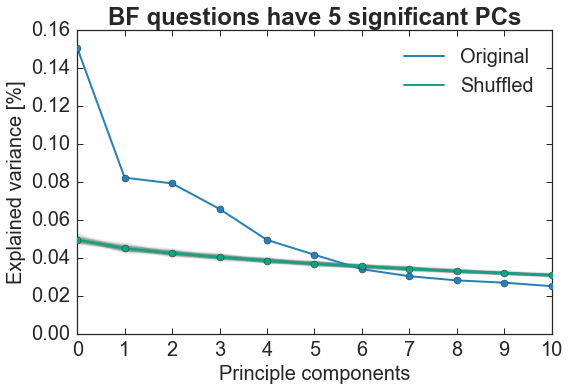

In [98]:
plt.figure()

shuffled_expl_vars = [[] for _ in range(11)]
times_greater = []
for _ in range(1000):
    explv = pca_shuf().explained_variance_ratio_
    for i, e in enumerate(explv[:11]):
        shuffled_expl_vars[i].append(e)
    if explv[5] > pca_orig.explained_variance_ratio_[5]:
        times_greater.append(1)
    else:
        times_greater.append(0)
    plt.plot(range(Q_shuf.shape[1]), explv, lw=1, alpha=0.002, c="#16a085")

plt.plot(range(Q_orig.shape[1]), pca_orig.explained_variance_ratio_, label="Original", lw=2, c="#2980b9")
plt.scatter(range(Q_orig.shape[1]), pca_orig.explained_variance_ratio_, s=50, zorder=15, c="#2980b9")

shuf_expl_var_vec = [np.mean(arr) for arr in shuffled_expl_vars]
plt.plot(range(11), shuf_expl_var_vec, label="Shuffled", lw=2, color="#16a085")
plt.scatter(range(11), shuf_expl_var_vec, c="#16a085", zorder=20, s=50)

plt.xticks(range(11), fontsize=20)
plt.yticks(fontsize=20)
plt.xlim([0,10])
plt.ylim([0, 0.16])
plt.xlabel("Principle components", fontsize=20)
plt.ylabel("Explained variance [%]", fontsize=20)
plt.title("BF questions have 5 significant PCs", fontsize=24, fontweight="bold")
plt.legend(fontsize=20)
plt.tight_layout()
#plt.savefig(FIGPATH + "significantPCs.pdf")
plt.show

print np.mean(times_greater)

## Supervised learning

In [8]:
def progress_percentage(i, c, N):
    if i * 1.0 / N >= c*0.1:
        print "%d%%" % (c*10), "",
        c += 1
    return c

def printarr(arr):
    outstr = "[ "
    for a in arr:
        nextstr = "%.02f" % a
        outstr += " " * (7 - len(nextstr))
        outstr += nextstr
    outstr += "   ]"
    return outstr

def get_classes(Y, num_classes=2, balanced=True, return_thresholds=False):
    """Balanced must be false for archetype resemblance because median is sometimes 0!"""
    
    if balanced is True:
        thresholds = [sorted(Y)[int(i-1)] for i in np.arange(0, len(Y)+1e-9, len(Y)*1.0 / num_classes)[1:-1]]
    elif balanced is False:
        y_min, y_max = min(Y), max(Y)
        thresholds = np.arange(y_min, y_max+1e-9, (y_max - y_min) * 1.0 / num_classes)[1:-1]  # small value added to include end threshold
    elif balanced=="normal":
        thresholds = [np.mean(Y) - np.std(Y)/2, np.mean(Y) + np.std(Y)/2]
    else:
        print "WARNING: No valid input for 'balanced', raising error."
        raise
    
    # >>> print num_classes, len(thresholds)
    # 3 2
    
    a = []
    for y in Y:
        for i, thr in enumerate(thresholds):
            if y < thr:
                a.append(i)
                break
        else:
            a.append(i+1)
    
    if not return_thresholds:
        return np.array(a)
    return np.array(a), thresholds

In [9]:
## Parameter tuning for each classification problem.
    
def parameter_tuning(X, y, n_search_iter=100, n_iter=5, param1='max_features', param2='n_estimators', savelabel=None):
    """Tune parameters with random and grid search."""
    
    ## ------------- ##
    ## Random search ##
    ## ------------- ##
    
    # specify parameters and distributions to sample from
    param_dist = {
        "n_estimators": sp_randint(10, 100),
        "min_samples_split": sp_randint(2, 13),
        "max_depth": sp_randint(3, 6),
        "min_samples_leaf": sp_randint(1, 10),
        "bootstrap": [True, False],
        "criterion": ["entropy", "gini"],
        "max_features": sp_randint(2, 38)
    }

    clf = RandomForestClassifier()
    cv = StratifiedShuffleSplit(y, n_iter=n_iter, test_size=0.2, random_state=42)
    
    # run randomized search
    random_search = RandomizedSearchCV(
        clf,
        param_distributions=param_dist,
        n_iter=n_search_iter,
        cv=cv
    )

    random_search.fit(X, y)
    
    ##print "Random search time:", time() - start, "s"
    
    ## ------------------------------------------------- ##
    ## Grid search in range of random search best result ##
    ## ------------------------------------------------- ##
    
    def range_around(val, maxval=np.inf):
        vals = filter(
            lambda v: 0 < v < maxval,
            sorted(set([int(val * (1 - 1/10.0*(n-5))) for n in range(10)]))
        )

        if len(vals) < 10:
            i = 0
            while len(vals) < 10:
                if i % 2 == 0 and min(vals) > 1:
                    vals.insert(0, min(vals)-1)
                if i % 2 == 1 and max(vals) < maxval:
                    vals.append(max(vals)+1)
                i += 1

        return vals
    
    # get only best result from random search
    param_grid = sorted(random_search.grid_scores_, key=itemgetter(1), reverse=True)[0][0]
    
    ##print "best random search parameters:", param_grid

    # convert two paramters to ranges around best from random search
    param_grid[param1] = range_around(param_grid[param1], maxval=38)
    param_grid[param2] = range_around(param_grid[param2])

    # convert remaining parameters to lists with single element
    param_grid = dict((k, [v]) if type(v) != list else (k, v) for (k, v) in param_grid.items())
    
    ##print "DEBUG: grid parameters:", param_grid

    # fit grid search
    cv = StratifiedShuffleSplit(y, n_iter=n_iter, test_size=0.2, random_state=42)
    gridrf = GridSearchCV(RandomForestClassifier(), param_grid=param_grid, cv=cv)
    gridrf.fit(X, y)

    ##print("The best parameters are %s with a score of %0.4f. Time %d seconds"
    ##      % (gridrf.best_params_, gridrf.best_score_, time() - start))

    ## --------------------- ##
    ## Visualize grid search ##
    ## --------------------- ##
    
    class MidpointNormalize(Normalize):
        def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
            self.midpoint = midpoint
            Normalize.__init__(self, vmin, vmax, clip)
        def __call__(self, value, clip=None):
            x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
            return np.ma.masked_array(np.interp(value, x, y))

    scores = np.array(
        [x[1] for x in gridrf.grid_scores_]
    ).reshape(len(param_grid[param1]), len(param_grid[param2]))

    plt.figure(figsize=(8, 6))
    plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
    plt.imshow(scores, interpolation='nearest', cmap=plt.cm.hot,
               norm=MidpointNormalize(vmin=0.33, midpoint=0.50))
    plt.xlabel(param2, fontsize=16)
    plt.ylabel(param1, fontsize=16)
    cb = plt.colorbar() # grab the Colorbar instance
    for t in cb.ax.get_yticklabels():
         t.set_fontsize(14)
    plt.xticks(np.arange(len(param_grid[param2])), param_grid[param2], rotation=45, fontsize=14)
    plt.yticks(np.arange(len(param_grid[param1])), param_grid[param1], fontsize=14)
    plt.title(savelabel, fontsize=16, fontweight='bold')
    
    if savelabel is None:
        plt.show()
    else:
        plt.savefig(FIGPATH + "parameter_tuning/" + savelabel + ".pdf")
    
    best_model = sorted(gridrf.grid_scores_, key=lambda x: x[1], reverse=True)[0]
    baseline = max(Counter(y).values()) * 1.0 / sum(Counter(y).values())
    
    return best_model[0], best_model[1], np.std(best_model[2]), baseline

#best_params, best_score, best_score_std, baseline = parameter_tuning(
#    Xtz, 
#    get_classes(Y[:, 4], num_classes=3, balanced=True),
#    n_iter=5,
#    n_search_iter=10,
#    savelabel="test"
#)

In [23]:
def cv_fold(Y, split_fraction, stratified):
    if not stratified:
        train = sample(set(range(len(Y))), int(len(Y) * 0.8))
        test = list(set(range(len(Y))) - set(train))
    if stratified:
        Y_tr = np.array(sample(set(range(len(Y))), int(len(Y) * split_fraction)))
        Y_te = np.array(list(set(range(len(Y))) - set(Y_tr)))
        num_classes = len(set(Y))
        num_in_class = int(len(Y) * split_fraction / len(set(Y)))
        
        train = []
        for i in range(num_classes):
            Y_tr_i = Y_tr[Y[Y_tr]==i]
            for _ in range(len(Y_tr) / num_classes * 2):  # sample class i from Y num_in_class times
                train.append(choice(Y_tr_i))
        
        test = []
        for i in range(num_classes):
            Y_te_i = Y_te[Y[Y_te]==i]
            for _ in range(len(Y_te) / num_classes * 2):  # sample class i from Y num_in_class times
                test.append(choice(Y_te_i))
                    
    return list(train), list(test)

def classifier_score(X, Y, folds, stratified, num_classes, params={}, rich_output=False, balance_classes=True):
    
    # parallel computing
    params.update({'n_jobs': -1})
    
    # fold scores and feat-importances
    score = []
    feat_importance = []
    
    # class labels and class thresholds in original Y values
    Y, thresholds = get_classes(Y, num_classes=num_classes, balanced=balance_classes, return_thresholds=True)
    
    class_score = np.empty((3, num_classes, folds))
    shitcounter = 0
    for fold in range(folds):
        train, test = cv_fold(Y, split_fraction=0.8, stratified=stratified)
        clf = RandomForestClassifier(**params).fit(X[train, :], Y[train])
        Y_pred = clf.predict(X[test, :])
        fold_class_score = np.zeros((3, num_classes))
        for y_pred, y in zip(Y_pred, Y):
            if y_pred == y:
                fold_class_score[0, y] += 1
            fold_class_score[1, y_pred] += 1
            fold_class_score[2, y] += 1
        class_score[:, :, fold] = fold_class_score
        
        if np.sum([0 if y == Y_pred[0] else 1 for y in Y_pred]) == 0:
            shitcounter += 1
            
        score.append(np.sum(Y_pred == Y[test]) * 1.0 / len(Y[test]))
        feat_importance.append(clf.feature_importances_)
    
    if shitcounter > 0:
        print "| WARNING: %d / %d uniform classifications" % (shitcounter, folds)
    
    baseline = max(Counter(Y).values()) * 1.0 / sum(Counter(Y).values())
    
    if not rich_output:
        return np.mean(score)
    
    return np.mean(score), np.std(score), baseline, np.mean(class_score, axis=2), zip(np.mean(feat_importance, axis=0), np.std(feat_importance, axis=0)), thresholds




def print_classifier_scores(X, T, label, tune_params=False, folds=100, stratified=False, num_classes=3, balanced_classes=True, visualize=False):
    profiles = {
        'arc': ["Achiever", "Host", "Wildcard", "Loyalist", "Hippie", "Follower"],
        'tra': ["Openness", "Conscientiousness", "Extraversion", "Agreeableness", "Neuroticism"],
        'pca': ["PC%d" % (pc+1) for pc in range(T.shape[1])]
        }[label]
    
    for i in range(T.shape[1]):
        
        print "## " + "-" * len(profiles[i]) + " ##"
        print "##", profiles[i].upper(), "##"
        print "## " + "-" * len(profiles[i]) + " ##\n"
        
        if label=="pca":
            print "| Inner products with Big Five traits [OCEAN] [  %.03f  %.03f  %.03f  %.03f  %.03f  ]" % tuple([np.dot(pca.components_[i], bfi[j]) for j in range(5)]),
        
        if tune_params:
            y, thresholds = get_classes(T[:, i], num_classes=num_classes, balanced=balanced_classes, return_thresholds=True)
            params, score_mean, score_std, baseline = parameter_tuning(X, y, savelabel=profiles[i], n_iter=folds)
            print "Model parameters:", json.dumps(params, indent=4)
        else:
            params = {}
            score_mean, score_std, baseline, class_score, feat_importance, thresholds = classifier_score(X, T[:, i], folds=folds, params=params, stratified=stratified, num_classes=num_classes, rich_output=True, balance_classes=balanced_classes)
        
        if visualize:
            # Histogram with decision boundaries
            plt.figure(figsize=(4.5, 3))
            sns.kdeplot(T[:, i]+1)
            for thr in thresholds:
                plt.plot([thr+1, thr+1], [0, 0.9], c="gray")
            plt.xticks([0, 20], fontsize=16)
            plt.yticks([0, 0.6], fontsize=16)
            plt.xlim([0, 20])
            plt.ylim([0,0.6])
            #plt.xlabel(profiles[i], fontsize=16)
            #plt.ylabel("Kernel density", fontsize=16)
            plt.tight_layout()
            #plt.savefig(FIGPATH + "trait_distributions/" + profiles[i] + ".pdf")
            plt.show()
            
        #print "Positives:     ", printarr(class_score[1])
        #print " True positives:", printarr(class_score[0])
        #print " Distribution:  ", printarr(class_score[2])
        #print
        print "Accuracy: " + "%.4f " % score_mean + "+-%.4f" % score_std, "| Baseline: %.4f" % baseline, "| Relative accuracy:", '\x1b[1;31m' + '%.4f ' % (score_mean-baseline) + '\x1b[0m'
        #print json.dumps(
        #    [(feature_name_map[feat_names[j]], "%.4f +-%.4f" % s) for j, s in sorted(enumerate(feat_importance), key=lambda x: x[1][0])[-5:]],
        #    indent=4
        #    )
        print

## -------- ##
## ACHIEVER ##
## -------- ##

Model parameters: {
    "bootstrap": true, 
    "min_samples_leaf": 8, 
    "n_estimators": 109, 
    "min_samples_split": 9, 
    "criterion": "gini", 
    "max_features": 5, 
    "max_depth": 4
}


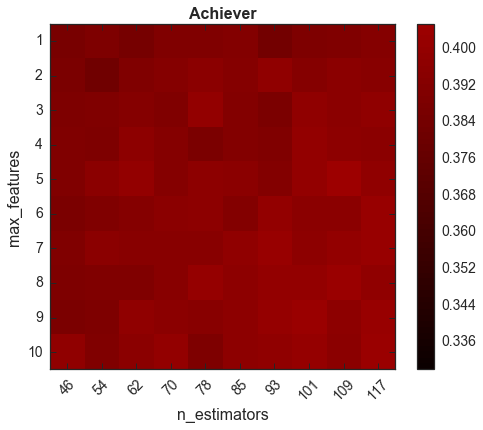

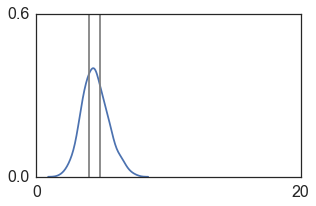

Accuracy: 0.4054 +-0.0449 | Baseline: 0.3371 | Relative accuracy: 0.0683 

## ---- ##
## HOST ##
## ---- ##

Model parameters: {
    "bootstrap": true, 
    "min_samples_leaf": 8, 
    "n_estimators": 88, 
    "min_samples_split": 5, 
    "criterion": "entropy", 
    "max_features": 1, 
    "max_depth": 4
}


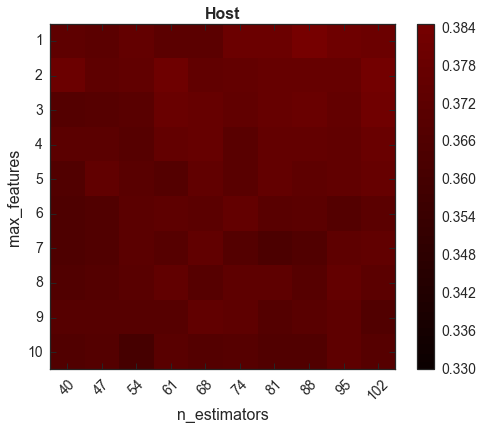

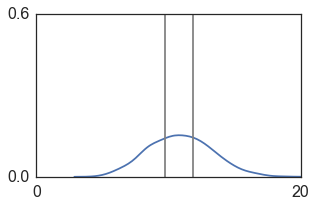

Accuracy: 0.3847 +-0.0501 | Baseline: 0.3371 | Relative accuracy: 0.0476 

## -------- ##
## WILDCARD ##
## -------- ##

Model parameters: {
    "bootstrap": false, 
    "min_samples_leaf": 6, 
    "n_estimators": 110, 
    "min_samples_split": 5, 
    "criterion": "gini", 
    "max_features": 2, 
    "max_depth": 3
}


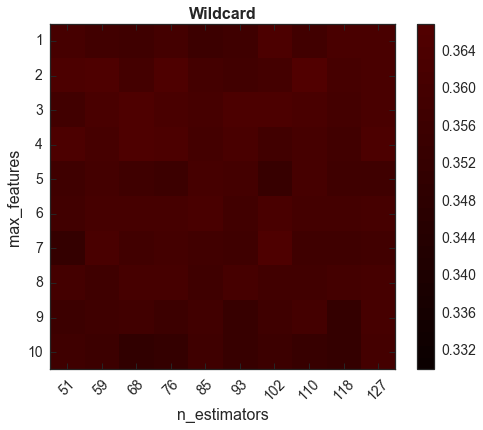

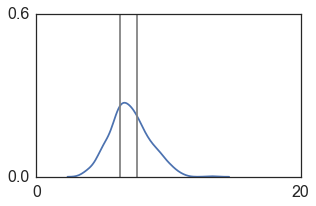

Accuracy: 0.3670 +-0.0415 | Baseline: 0.3371 | Relative accuracy: 0.0299 

## -------- ##
## LOYALIST ##
## -------- ##

Model parameters: {
    "bootstrap": true, 
    "min_samples_leaf": 9, 
    "n_estimators": 43, 
    "min_samples_split": 3, 
    "criterion": "entropy", 
    "max_features": 8, 
    "max_depth": 5
}


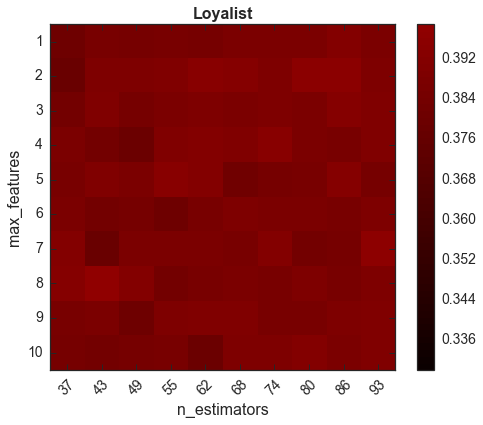

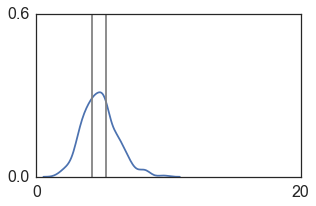

Accuracy: 0.3990 +-0.0463 | Baseline: 0.3439 | Relative accuracy: 0.0551 

## ------ ##
## HIPPIE ##
## ------ ##

Model parameters: {
    "bootstrap": true, 
    "min_samples_leaf": 7, 
    "n_estimators": 84, 
    "min_samples_split": 6, 
    "criterion": "entropy", 
    "max_features": 16, 
    "max_depth": 3
}


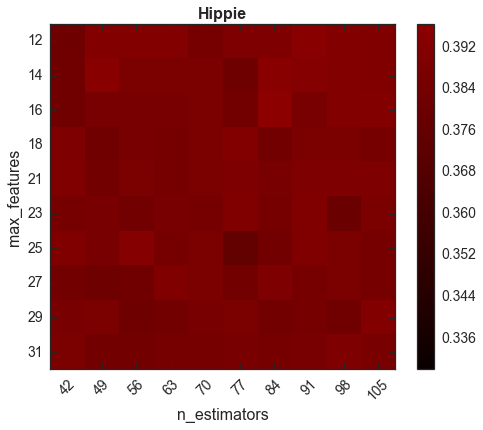

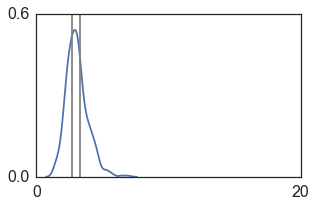

Accuracy: 0.3965 +-0.0458 | Baseline: 0.3371 | Relative accuracy: 0.0594 

## -------- ##
## FOLLOWER ##
## -------- ##

Model parameters: {
    "bootstrap": false, 
    "min_samples_leaf": 7, 
    "n_estimators": 109, 
    "min_samples_split": 9, 
    "criterion": "entropy", 
    "max_features": 9, 
    "max_depth": 3
}


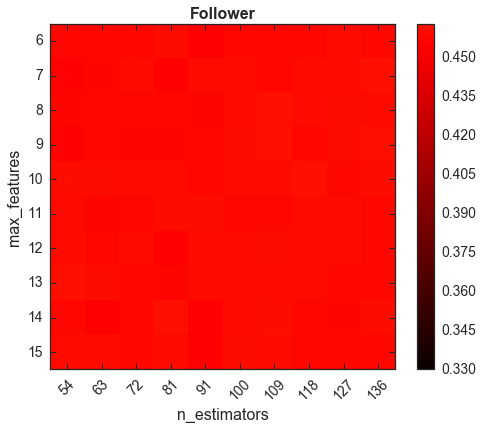

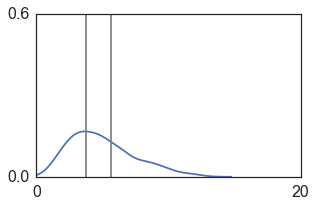

Accuracy: 0.4628 +-0.0380 | Baseline: 0.3756 | Relative accuracy: 0.0872 



In [24]:
print_classifier_scores(Xtz, D, "arc", tune_params=True, folds=100, stratified=False, num_classes=3, balanced_classes=True, visualize=True)

In [ ]:
start = dt.now()
print_classifier_scores(Xtz, Q_pca, "pca", tune_params=True, folds=100, stratified=False, num_classes=3, balanced_classes=True, visualize=True)
print dt.now()-start

## -------- ##
## OPENNESS ##
## -------- ##

Model parameters: {
    "bootstrap": true, 
    "min_samples_leaf": 8, 
    "n_estimators": 24, 
    "min_samples_split": 2, 
    "criterion": "gini", 
    "max_features": 1, 
    "max_depth": 3
}


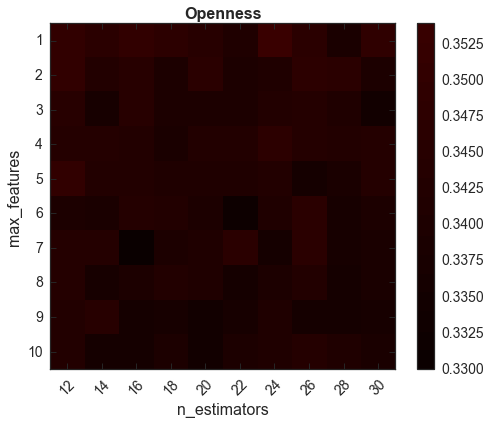

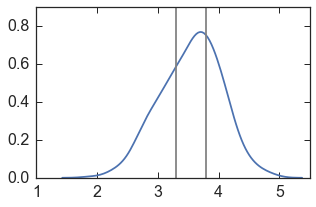

Accuracy: 0.3539 +-0.0443 | Baseline: 0.3665 | Relative accuracy: -0.0126 

## ----------------- ##
## CONSCIENTIOUSNESS ##
## ----------------- ##

Model parameters: {
    "bootstrap": true, 
    "min_samples_leaf": 4, 
    "n_estimators": 91, 
    "min_samples_split": 10, 
    "criterion": "entropy", 
    "max_features": 5, 
    "max_depth": 5
}


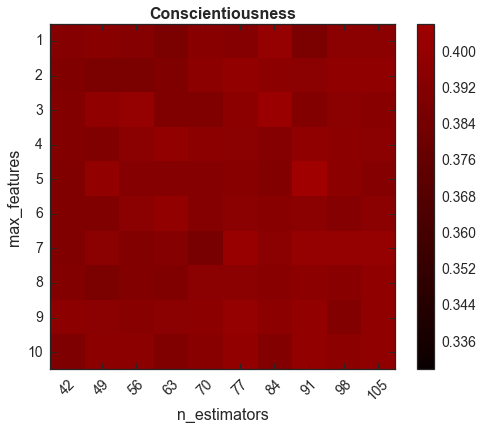

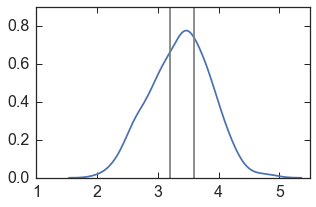

Accuracy: 0.4062 +-0.0453 | Baseline: 0.3643 | Relative accuracy: 0.0420 

## ------------ ##
## EXTRAVERSION ##
## ------------ ##

Model parameters: {
    "bootstrap": false, 
    "min_samples_leaf": 5, 
    "n_estimators": 121, 
    "min_samples_split": 9, 
    "criterion": "entropy", 
    "max_features": 11, 
    "max_depth": 3
}


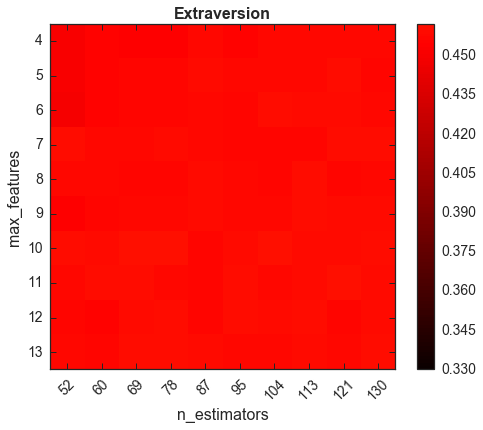

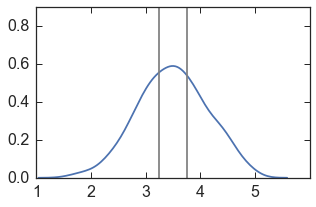

Accuracy: 0.4622 +-0.0350 | Baseline: 0.3756 | Relative accuracy: 0.0867 

## ------------- ##
## AGREEABLENESS ##
## ------------- ##

Model parameters: {
    "bootstrap": true, 
    "min_samples_leaf": 7, 
    "n_estimators": 99, 
    "min_samples_split": 3, 
    "criterion": "entropy", 
    "max_features": 1, 
    "max_depth": 3
}


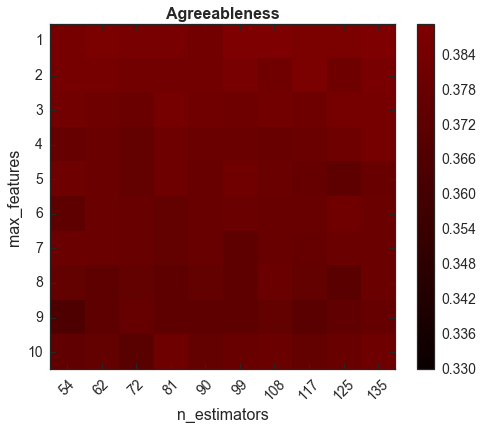

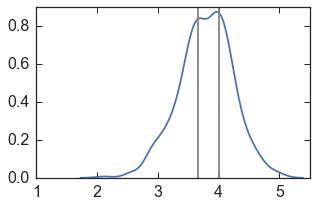

Accuracy: 0.3894 +-0.0193 | Baseline: 0.3891 | Relative accuracy: 0.0003 

## ----------- ##
## NEUROTICISM ##
## ----------- ##

Model parameters: {
    "bootstrap": false, 
    "min_samples_leaf": 7, 
    "n_estimators": 32, 
    "min_samples_split": 7, 
    "criterion": "gini", 
    "max_features": 3, 
    "max_depth": 3
}


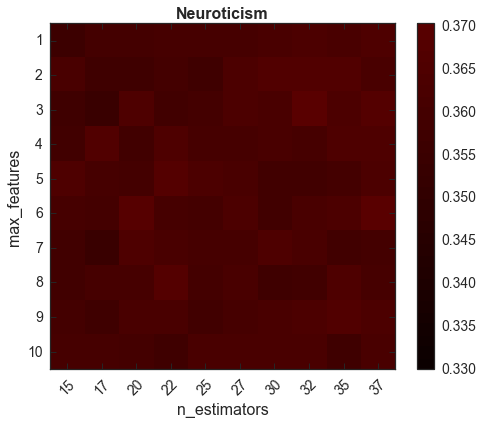

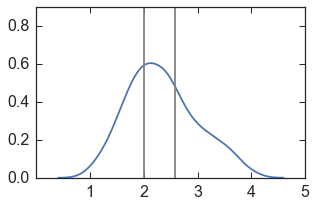

Accuracy: 0.3703 +-0.0421 | Baseline: 0.3665 | Relative accuracy: 0.0038 



In [653]:
print_classifier_scores(Xtz, Y, "tra", tune_params=True, folds=100, stratified=False, num_classes=3, balanced_classes=True, visualize=True)

## -------- ##
## ACHIEVER ##
## -------- ##

Model parameters: {
    "bootstrap": false, 
    "min_samples_leaf": 5, 
    "n_estimators": 136, 
    "min_samples_split": 11, 
    "criterion": "gini", 
    "max_features": 3, 
    "max_depth": 5
}


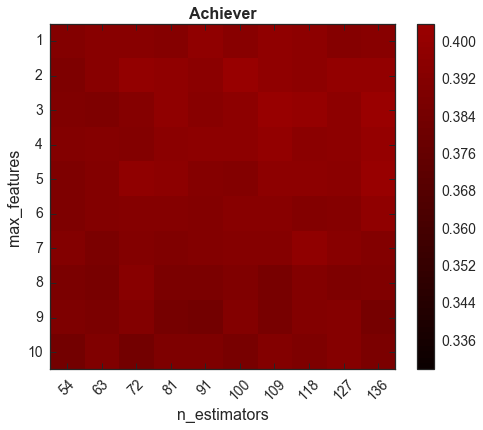

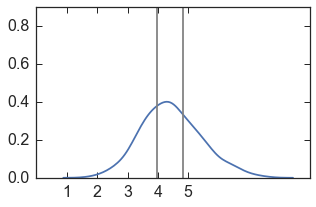

Accuracy: 0.4040 +-0.0436 | Baseline: 0.3371 | Relative accuracy: 0.0669 

## ---- ##
## HOST ##
## ---- ##

Model parameters: {
    "bootstrap": true, 
    "min_samples_leaf": 4, 
    "n_estimators": 64, 
    "min_samples_split": 12, 
    "criterion": "entropy", 
    "max_features": 6, 
    "max_depth": 5
}


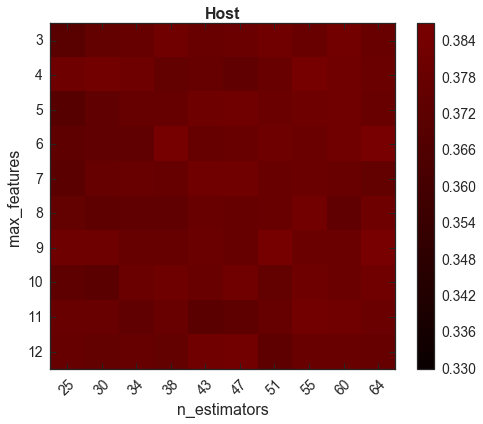

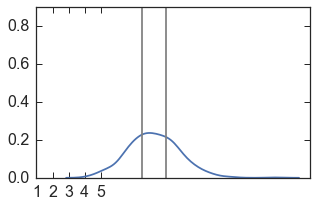

Accuracy: 0.3870 +-0.0472 | Baseline: 0.3371 | Relative accuracy: 0.0499 

## -------- ##
## WILDCARD ##
## -------- ##

Model parameters: {
    "bootstrap": false, 
    "min_samples_leaf": 8, 
    "n_estimators": 68, 
    "min_samples_split": 9, 
    "criterion": "gini", 
    "max_features": 1, 
    "max_depth": 3
}


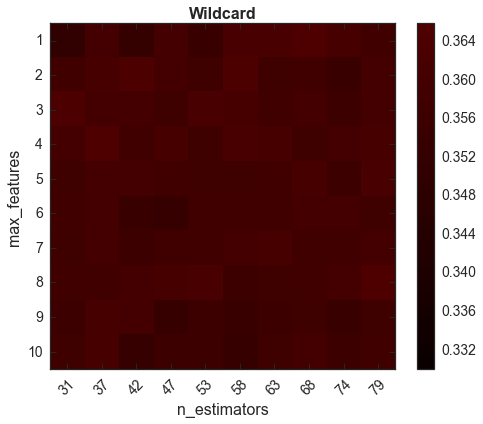

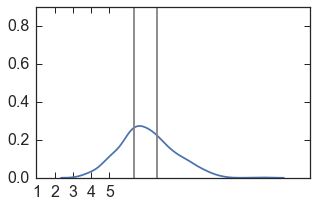

Accuracy: 0.3658 +-0.0465 | Baseline: 0.3371 | Relative accuracy: 0.0287 

## -------- ##
## LOYALIST ##
## -------- ##

Model parameters: {
    "bootstrap": false, 
    "min_samples_leaf": 3, 
    "n_estimators": 128, 
    "min_samples_split": 3, 
    "criterion": "gini", 
    "max_features": 2, 
    "max_depth": 4
}


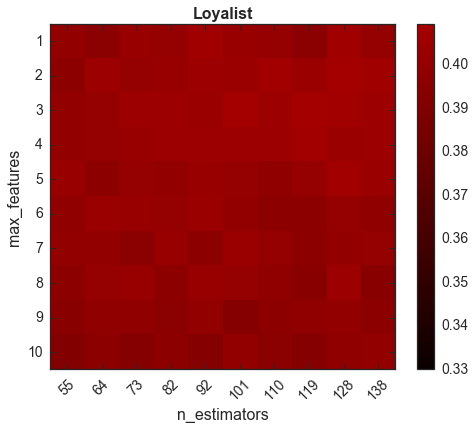

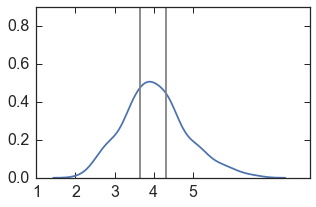

Accuracy: 0.4093 +-0.0513 | Baseline: 0.3371 | Relative accuracy: 0.0722 

## ------ ##
## HIPPIE ##
## ------ ##

Model parameters: {
    "bootstrap": false, 
    "min_samples_leaf": 3, 
    "n_estimators": 22, 
    "min_samples_split": 7, 
    "criterion": "entropy", 
    "max_features": 16, 
    "max_depth": 4
}


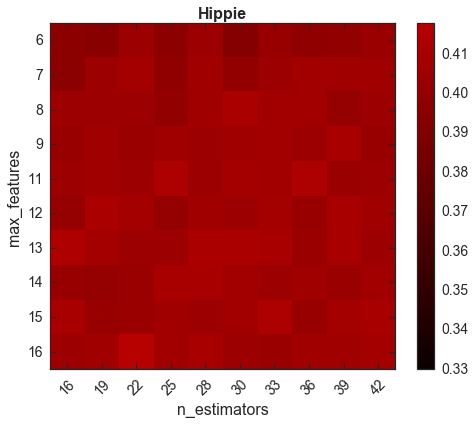

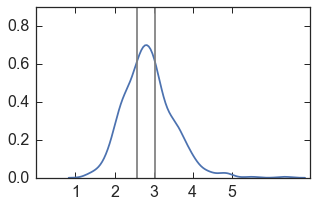

Accuracy: 0.4178 +-0.0497 | Baseline: 0.3371 | Relative accuracy: 0.0806 

## -------- ##
## FOLLOWER ##
## -------- ##

Model parameters: {
    "bootstrap": false, 
    "min_samples_leaf": 6, 
    "n_estimators": 90, 
    "min_samples_split": 10, 
    "criterion": "entropy", 
    "max_features": 8, 
    "max_depth": 3
}


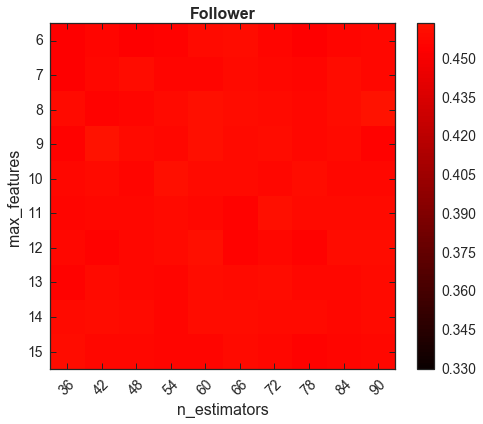

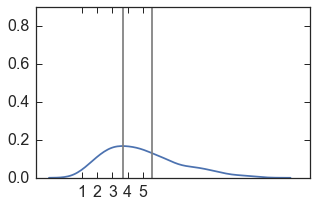

Accuracy: 0.4638 +-0.0349 | Baseline: 0.3756 | Relative accuracy: 0.0883 



In [654]:
print_classifier_scores(Xtz, D, "arc", tune_params=True, folds=100, stratified=False, num_classes=3, balanced_classes=True, visualize=True)

## --- ##
## PC1 ##
## --- ##

| Inner products with Big Five traits [OCEAN] [  -0.604  0.343  -0.199  -0.152  0.346  ] Model parameters: {
    "bootstrap": false, 
    "min_samples_leaf": 3, 
    "n_estimators": 30, 
    "min_samples_split": 3, 
    "criterion": "entropy", 
    "max_features": 1, 
    "max_depth": 5
}


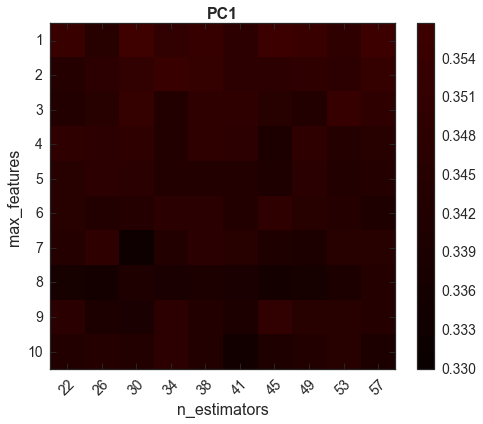

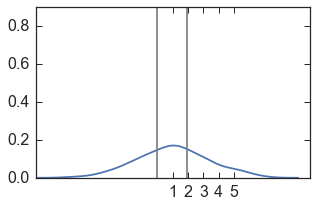

Accuracy: 0.3567 +-0.0496 | Baseline: 0.3371 | Relative accuracy: 0.0196 

## --- ##
## PC2 ##
## --- ##

| Inner products with Big Five traits [OCEAN] [  -1.022  -0.517  -0.157  -0.475  -0.239  ] Model parameters: {
    "bootstrap": true, 
    "min_samples_leaf": 7, 
    "n_estimators": 21, 
    "min_samples_split": 8, 
    "criterion": "gini", 
    "max_features": 22, 
    "max_depth": 4
}


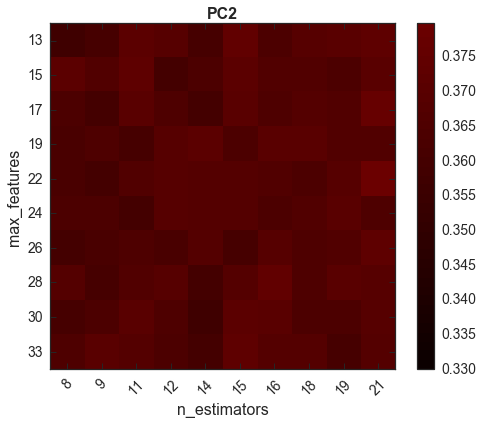

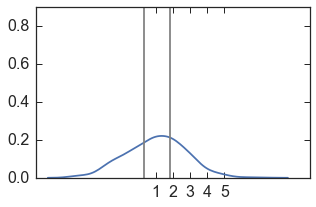

Accuracy: 0.3798 +-0.0570 | Baseline: 0.3371 | Relative accuracy: 0.0427 

## --- ##
## PC3 ##
## --- ##

| Inner products with Big Five traits [OCEAN] [  -1.282  0.077  -0.336  0.161  -0.150  ] Model parameters: {
    "bootstrap": true, 
    "min_samples_leaf": 9, 
    "n_estimators": 56, 
    "min_samples_split": 12, 
    "criterion": "entropy", 
    "max_features": 9, 
    "max_depth": 3
}


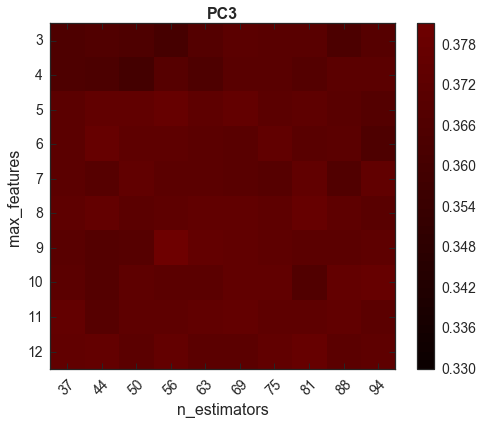

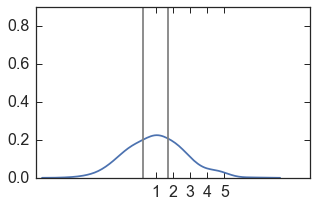

Accuracy: 0.3812 +-0.0446 | Baseline: 0.3371 | Relative accuracy: 0.0441 

## --- ##
## PC4 ##
## --- ##

| Inner products with Big Five traits [OCEAN] [  0.709  0.028  0.154  0.055  0.119  ] Model parameters: {
    "bootstrap": true, 
    "min_samples_leaf": 9, 
    "n_estimators": 99, 
    "min_samples_split": 3, 
    "criterion": "entropy", 
    "max_features": 9, 
    "max_depth": 4
}


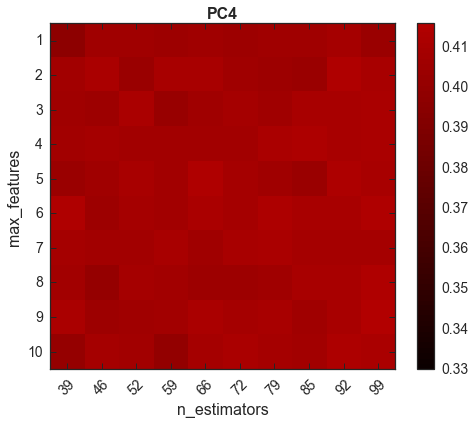

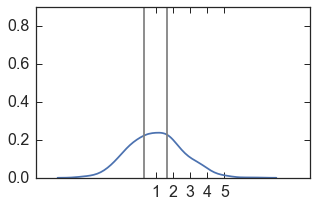

Accuracy: 0.4158 +-0.0411 | Baseline: 0.3371 | Relative accuracy: 0.0787 

## --- ##
## PC5 ##
## --- ##

| Inner products with Big Five traits [OCEAN] [  0.182  0.075  0.335  0.799  0.537  ] Model parameters: {
    "bootstrap": true, 
    "min_samples_leaf": 6, 
    "n_estimators": 50, 
    "min_samples_split": 7, 
    "criterion": "gini", 
    "max_features": 22, 
    "max_depth": 4
}


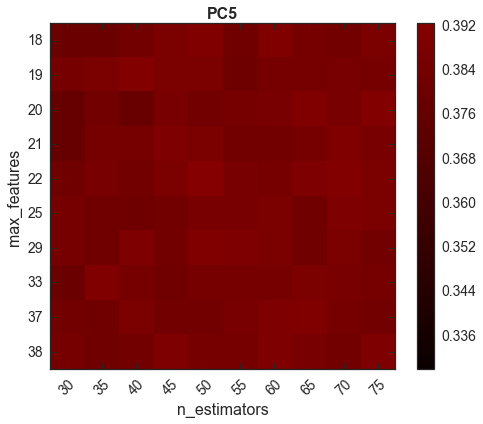

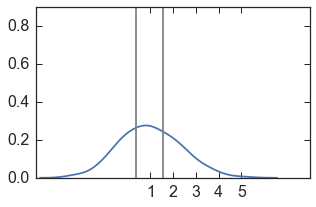

Accuracy: 0.3925 +-0.0474 | Baseline: 0.3371 | Relative accuracy: 0.0554 



In [655]:
print_classifier_scores(Xtz, Q_pca, "pca", tune_params=True, folds=100, stratified=False, num_classes=3, balanced_classes=True, visualize=True)

# Parameter tuning

In [ ]:
def classifier_score(X, Y, folds, stratified, num_classes, rich_output=False, balance_classes=True):
    score = []
    
    feat_importance = []
    Y, thresholds = get_classes(Y, num_classes=num_classes, balanced=balance_classes, return_thresholds=True)

    class_score = np.empty((3, num_classes, folds))
    shitcounter = 0
    for fold in range(folds):
        train, test = cv_fold(Y, split_fraction=0.8, stratified=stratified)
        clf = RandomForestClassifier(n_estimators=100).fit(X[train, :], Y[train])
        Y_pred = clf.predict(X[test, :])
        fold_class_score = np.zeros((3, num_classes))
        for y_pred, y in zip(Y_pred, Y):
            if y_pred == y:
                fold_class_score[0, y] += 1
            fold_class_score[1, y_pred] += 1
            fold_class_score[2, y] += 1
        class_score[:, :, fold] = fold_class_score
        
        if np.sum([0 if y == Y_pred[0] else 1 for y in Y_pred]) == 0:
            shitcounter += 1
            
        score.append(np.sum(Y_pred == Y[test]) * 1.0 / len(Y[test]))
        feat_importance.append(clf.feature_importances_)
    
    print "| Uniform classifications:", shitcounter, "/", folds
    
    baseline = max(Counter(Y).values()) * 1.0 / sum(Counter(Y).values())
    
    if not rich_output:
        return np.mean(score)
    
    return np.mean(score), np.std(score), baseline, np.mean(class_score, axis=2), zip(np.mean(feat_importance, axis=0), np.std(feat_importance, axis=0)), thresholds

In [180]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.cross_validation import StratifiedShuffleSplit
from sklearn.grid_search import GridSearchCV


# Utility function to move the midpoint of a colormap to be around
# the values of interest.

X = Xtz
y = get_classes(Y[:, 2], num_classes=3, balanced=True)

C_range = np.logspace(-2, 10, 13)
gamma_range = np.logspace(-9, 3, 13)
param_grid = dict(gamma=gamma_range, C=C_range)
cv = StratifiedShuffleSplit(y, n_iter=5, test_size=0.2, random_state=42)
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=cv)
grid.fit(X, y)

print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

The best parameters are {'C': 1.0, 'gamma': 0.01} with a score of 0.47


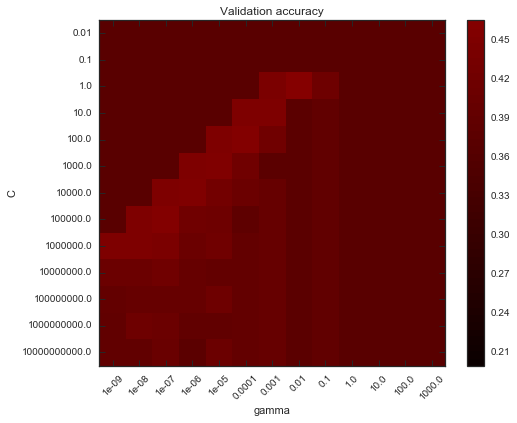

In [182]:
class MidpointNormalize(Normalize):

    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))

scores = [x[1] for x in grid.grid_scores_]
scores = np.array(scores).reshape(len(C_range), len(gamma_range))

plt.figure(figsize=(8, 6))
plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
plt.imshow(scores, interpolation='nearest', cmap=plt.cm.hot,
           norm=MidpointNormalize(vmin=0.2, midpoint=0.92))
plt.xlabel('gamma')
plt.ylabel('C')
plt.colorbar()
plt.xticks(np.arange(len(gamma_range)), gamma_range, rotation=45)
plt.yticks(np.arange(len(C_range)), C_range)
plt.title('Validation accuracy')
plt.show()

In [204]:
X = Xtz
y = get_classes(Y[:, 0], num_classes=3, balanced=True)

param_grid = {
    "n_estimators": [56, 58, 60, 62, 64],
    "min_samples_split": [2, 3, 10, 11, 12, 13],
    "max_depth": [3, 4],
    "min_samples_leaf": [1, 3, 10],
    "bootstrap": [True],
    "criterion": ["entropy"]
}
cv = StratifiedShuffleSplit(y, n_iter=5, test_size=0.2, random_state=42)
gridrf = GridSearchCV(RandomForestClassifier(), param_grid=param_grid, cv=cv)
gridrf.fit(X, y)

print("The best parameters are %s with a score of %0.4f"
      % (gridrf.best_params_, gridrf.best_score_))

The best parameters are {'bootstrap': True, 'min_samples_leaf': 1, 'n_estimators': 60, 'criterion': 'entropy', 'min_samples_split': 13, 'max_depth': 3} with a score of 0.3888


In [540]:
gridrf.grid_scores_[0][2]

array([ 0.38202247,  0.38202247,  0.26966292,  0.41573034,  0.34831461])



#### Extraversion
The best parameters are {'bootstrap': True, 'min_samples_leaf': 3, 'n_estimators': 60, 'criterion': 'entropy', 'min_samples_split': 3, 'max_depth': 4} with a score of 0.4719
The best parameters are {'min_samples_split': 11, 'n_estimators': 56, 'bootstrap': True, 'criterion': 'entropy', 'max_depth': 3} with a score of 0.4719
The best parameters are {'min_samples_split': 10, 'n_estimators': 58, 'bootstrap': True, 'criterion': 'entropy', 'max_depth': 3} with a score of 0.4674
The best parameters are {'min_samples_split': 11, 'n_estimators': 60, 'bootstrap': True, 'criterion': 'entropy', 'max_depth': 3} with a score of 0.4719
The best parameters are {'min_samples_split': 12, 'n_estimators': 60, 'bootstrap': True, 'criterion': 'entropy', 'max_depth': 4} with a score of 0.4854
The best parameters are {'min_samples_split': 8, 'n_estimators': 60, 'bootstrap': True, 'criterion': 'entropy', 'max_depth': 3} with a score of 0.47
The best parameters are {'min_samples_split': 10, 'n_estimators': 55, 'bootstrap': True, 'criterion': 'gini', 'max_depth': 3} with a score of 0.48
The best parameters are {'min_samples_split': 10, 'n_estimators': 60, 'bootstrap': True, 'criterion': 'entropy'} with a score of 0.46
The best parameters are {'min_samples_split': 3, 'n_estimators': 60, 'bootstrap': True, 'criterion': 'entropy'} with a score of 0.46

In [ ]:
class MidpointNormalize(Normalize):

    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))

scores = [x[1] for x in grid.grid_scores_]
scores = np.array(scores).reshape(len(C_range), len(gamma_range))

plt.figure(figsize=(8, 6))
plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
plt.imshow(scores, interpolation='nearest', cmap=plt.cm.hot,
           norm=MidpointNormalize(vmin=0.2, midpoint=0.92))
plt.xlabel('gamma')
plt.ylabel('C')
plt.colorbar()
plt.xticks(np.arange(len(gamma_range)), gamma_range, rotation=45)
plt.yticks(np.arange(len(C_range)), C_range)
plt.title('Validation accuracy')
plt.show()

In [212]:
import numpy as np

from time import time
from operator import itemgetter
from scipy.stats import randint as sp_randint

from sklearn.grid_search import GridSearchCV, RandomizedSearchCV
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier

X = Xtz
y = get_classes(Y[:, 2], num_classes=3, balanced=True)

# Utility function to report best scores
def report(grid_scores, n_top=3):
    top_scores = sorted(grid_scores, key=itemgetter(1), reverse=True)[:n_top]
    for i, score in enumerate(top_scores):
        print("Model with rank: {0}".format(i + 1))
        print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
              score.mean_validation_score,
              np.std(score.cv_validation_scores)))
        print("Parameters: {0}".format(score.parameters))
        print("")


# specify parameters and distributions to sample from
param_dist = {
    "n_estimators": sp_randint(10, 100),
    "min_samples_split": sp_randint(2, 13),
    "max_depth": sp_randint(3, 6),
    "min_samples_leaf": sp_randint(1, 10),
    "bootstrap": [True, False],
    "criterion": ["entropy", "gini"]
}

cv = StratifiedShuffleSplit(y, n_iter=5, test_size=0.2, random_state=42)

# run randomized search
n_iter_search = 500
random_search = RandomizedSearchCV(RandomForestClassifier(), param_distributions=param_dist,
                                   n_iter=n_iter_search, cv=cv)

start = time()
random_search.fit(X, y)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))
report(random_search.grid_scores_)

RandomizedSearchCV took 176.53 seconds for 500 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.472 (std: 0.012)
Parameters: {'bootstrap': False, 'min_samples_leaf': 4, 'n_estimators': 76, 'criterion': 'entropy', 'min_samples_split': 5, 'max_depth': 3}

Model with rank: 2
Mean validation score: 0.467 (std: 0.021)
Parameters: {'bootstrap': True, 'min_samples_leaf': 6, 'n_estimators': 67, 'criterion': 'gini', 'min_samples_split': 8, 'max_depth': 3}

Model with rank: 3
Mean validation score: 0.467 (std: 0.031)
Parameters: {'bootstrap': True, 'min_samples_leaf': 9, 'n_estimators': 60, 'criterion': 'entropy', 'min_samples_split': 3, 'max_depth': 5}



## Feature Selection

In [25]:
def backwards_forwards_feature_selection(X, Y, scoring_function, maxruns=100):
    N, M = X.shape
    removed_counter = Counter()
    recently_removed = [-1] * 2
    fs = np.empty((0, M))
    fs_score = []
    selected_against = set()
    loop_counter = 0
    percentage = 0
    while True:
        fs_iter = [np.nan] * M
        full_score = scoring_function(X[:, list(set(range(M)) - selected_against)], Y)

        start = dt.now()
        remove_candidate = (-1, -0.2)
        for i in set(range(M)) - selected_against:
            iter_score = scoring_function(X[:, list(set(range(M)) - selected_against - {i})], Y)
            i_score = iter_score - full_score
            fs_iter[range(M).index(i)] = i_score
            remove_candidate = (i, i_score) if i_score > remove_candidate[1] else remove_candidate
        #print "remove-loop", dt.now() - start

        recently_removed = recently_removed[1:] + [remove_candidate[0]]

        new_full_score = scoring_function(X[:, list(set(range(M)) - selected_against - {remove_candidate[0]})], Y)

        start = dt.now()
        add_candidate = (-1, 0)
        for i in selected_against - set(recently_removed):
            iter_score = scoring_function(X[:, list((set(range(M)) - selected_against) | {i})], Y)
            i_score = iter_score - new_full_score
            add_candidate = (i, i_score) if i_score > add_candidate[1] else add_candidate
        #print "add-loop", dt.now() - start

        if add_candidate[0] != -1 and removed_counter[add_candidate[0]] < 3:
            fs_iter[range(M).index(add_candidate[0])] = add_candidate[1]
            #selected_against.remove(add_candidate[0])
            #print remove_candidate, add_candidate

        if remove_candidate[0] != -1:
            fs = np.vstack([fs, np.array(fs_iter)])
            #selected_against.add(remove_candidate[0])
            removed_counter.update([remove_candidate[0]])

        if add_candidate[0] != -1 or remove_candidate[0] != -1:
            start = dt.now()
            score = scoring_function(X[:, list(set(range(M)) - selected_against)], Y)
            fs_score.append(score)
            #print "update-clause", dt.now() - start

        #print recently_removed

        else:
            break

        if len(set(range(M)) - selected_against) < 10:
            break
    
        if loop_counter == maxruns:
            break
        else:
            loop_counter += 1
            
        percentage = progress_percentage(loop_counter, percentage, maxruns)

    plt.figure(figsize=tuple(np.array(fs.shape[::-1]) * 17.0 / fs.shape[1]))
    #plt.title("target %d" % target, fontsize=40)
    sns.heatmap(-fs.T)
    plt.show()
    fig = plt.figure(figsize=(12.25,1))
    ax = fig.add_subplot(1, 1, 1)
    ax.yaxis.tick_right()
    plt.plot(range(len(fs_score)), fs_score)
    #plt.savefig(TMPFIGPATH+"feature_selection_%d_archetypes.pdf" % target)
    plt.show()
    
    return {
        'fs_max': fs[max(list(enumerate(fs_score)), key=lambda x: x[1])[0], :],
        'fs': fs,
        'fs_score': fs_score
        }

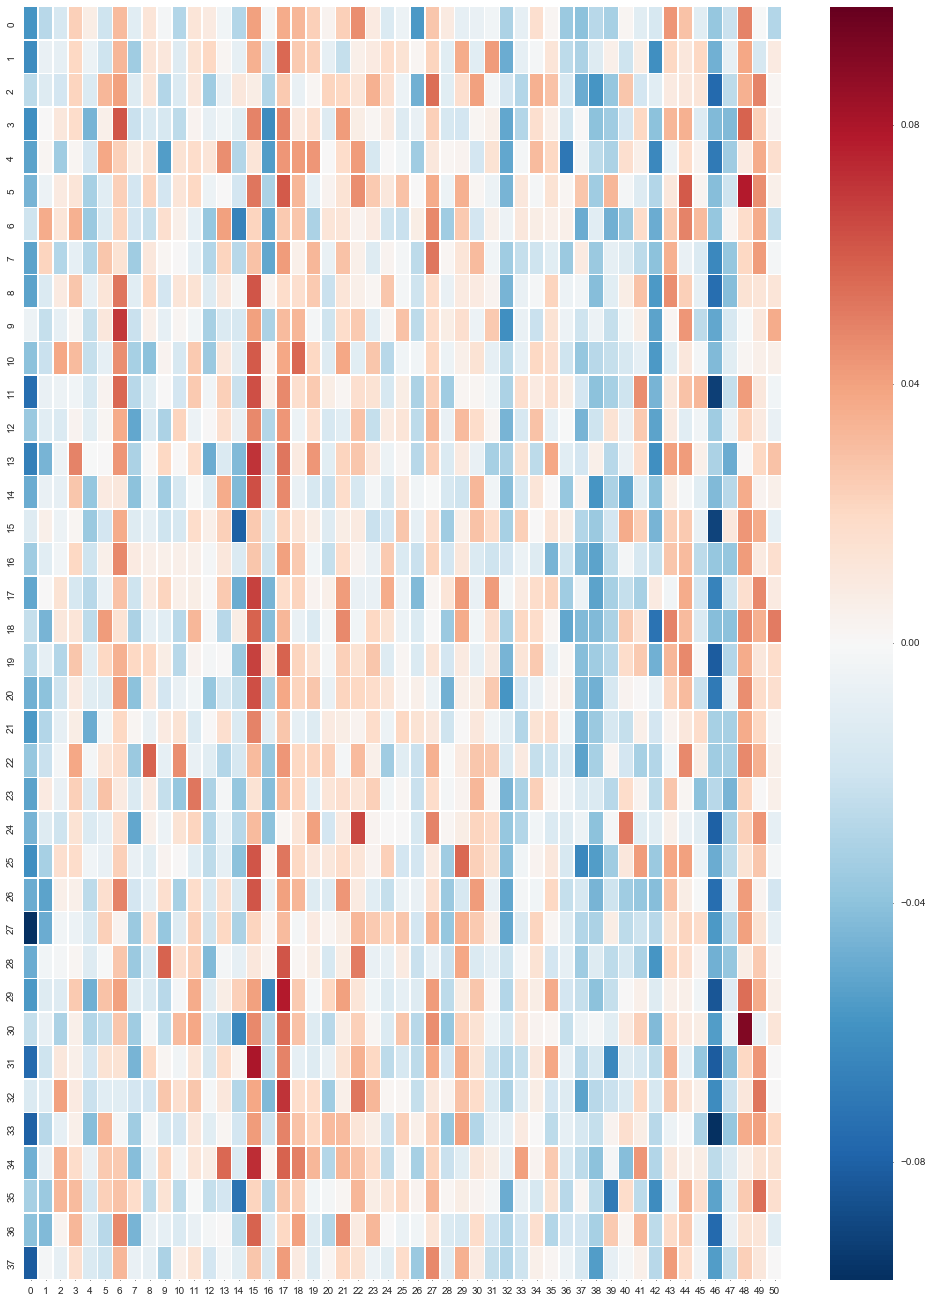

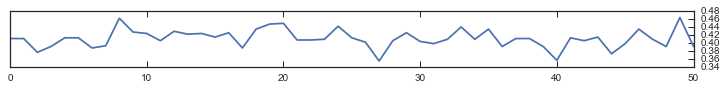

{'fs': array([[  5.81818182e-02,   6.18181818e-02,   2.54545455e-02, ...,
           3.27272727e-02,   4.00000000e-02,   8.18181818e-02],
        [  2.72727273e-02,   7.27272727e-03,   1.27272727e-02, ...,
           3.63636364e-02,   4.36363636e-02,   1.81818182e-03],
        [  1.63636364e-02,   9.09090909e-03,   1.81818182e-02, ...,
          -3.27272727e-02,  -3.63636364e-03,   9.09090909e-03],
        ..., 
        [ -4.90909091e-02,  -3.81818182e-02,  -3.45454545e-02, ...,
          -2.54545455e-02,  -1.45454545e-02,  -2.36363636e-02],
        [  1.11022302e-16,   1.63636364e-02,  -4.90909091e-02, ...,
          -5.45454545e-02,  -1.27272727e-02,  -1.09090909e-02],
        [  2.90909091e-02,  -9.09090909e-03,  -1.81818182e-03, ...,
          -1.63636364e-02,   1.09090909e-02,   0.00000000e+00]]),
 'fs_max': array([  1.11022302e-16,   1.63636364e-02,  -4.90909091e-02,
         -2.36363636e-02,  -3.63636364e-02,  -4.54545455e-02,
         -3.63636364e-02,  -4.18181818e-02,  -1.2727

In [28]:
backwards_forwards_feature_selection(Xtz, Y[:, 2], classifier_score, 50)

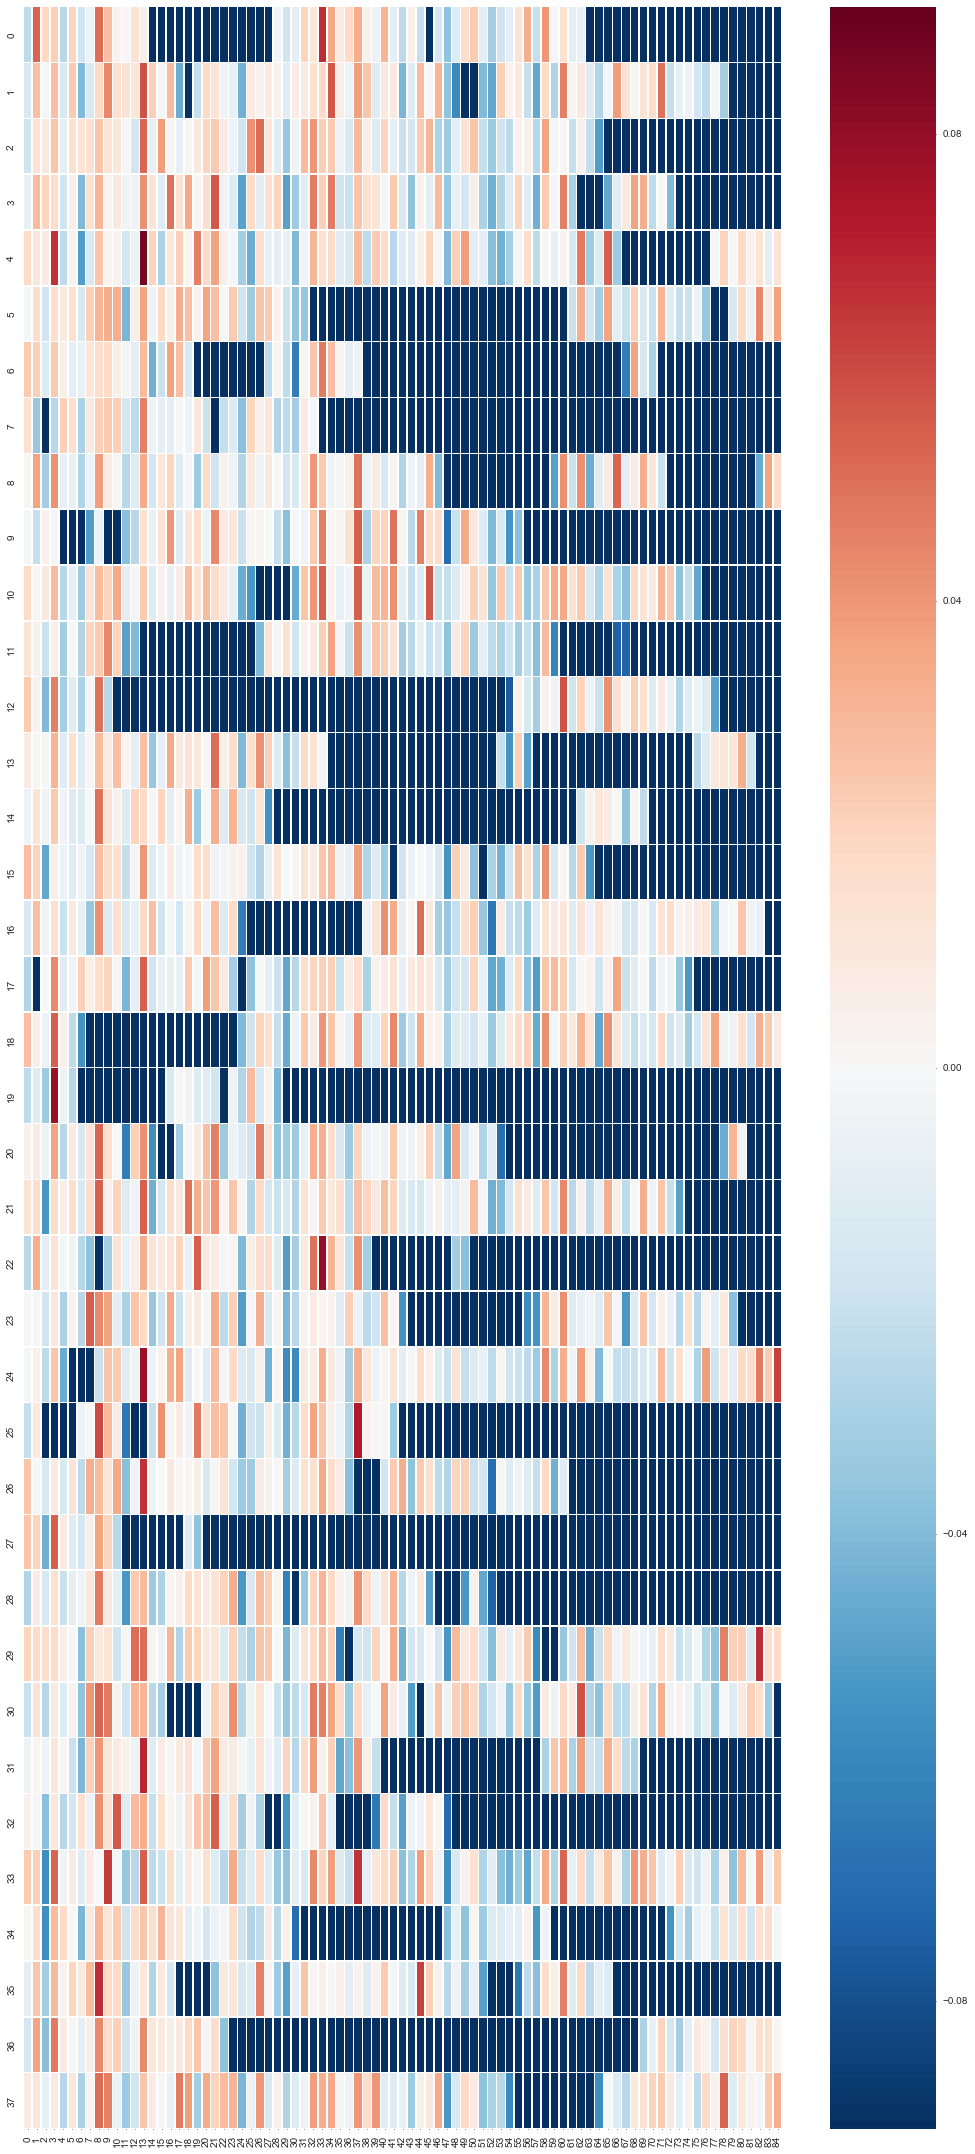

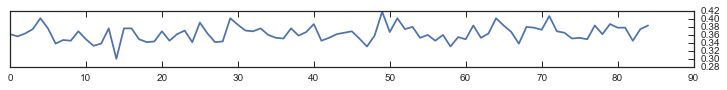

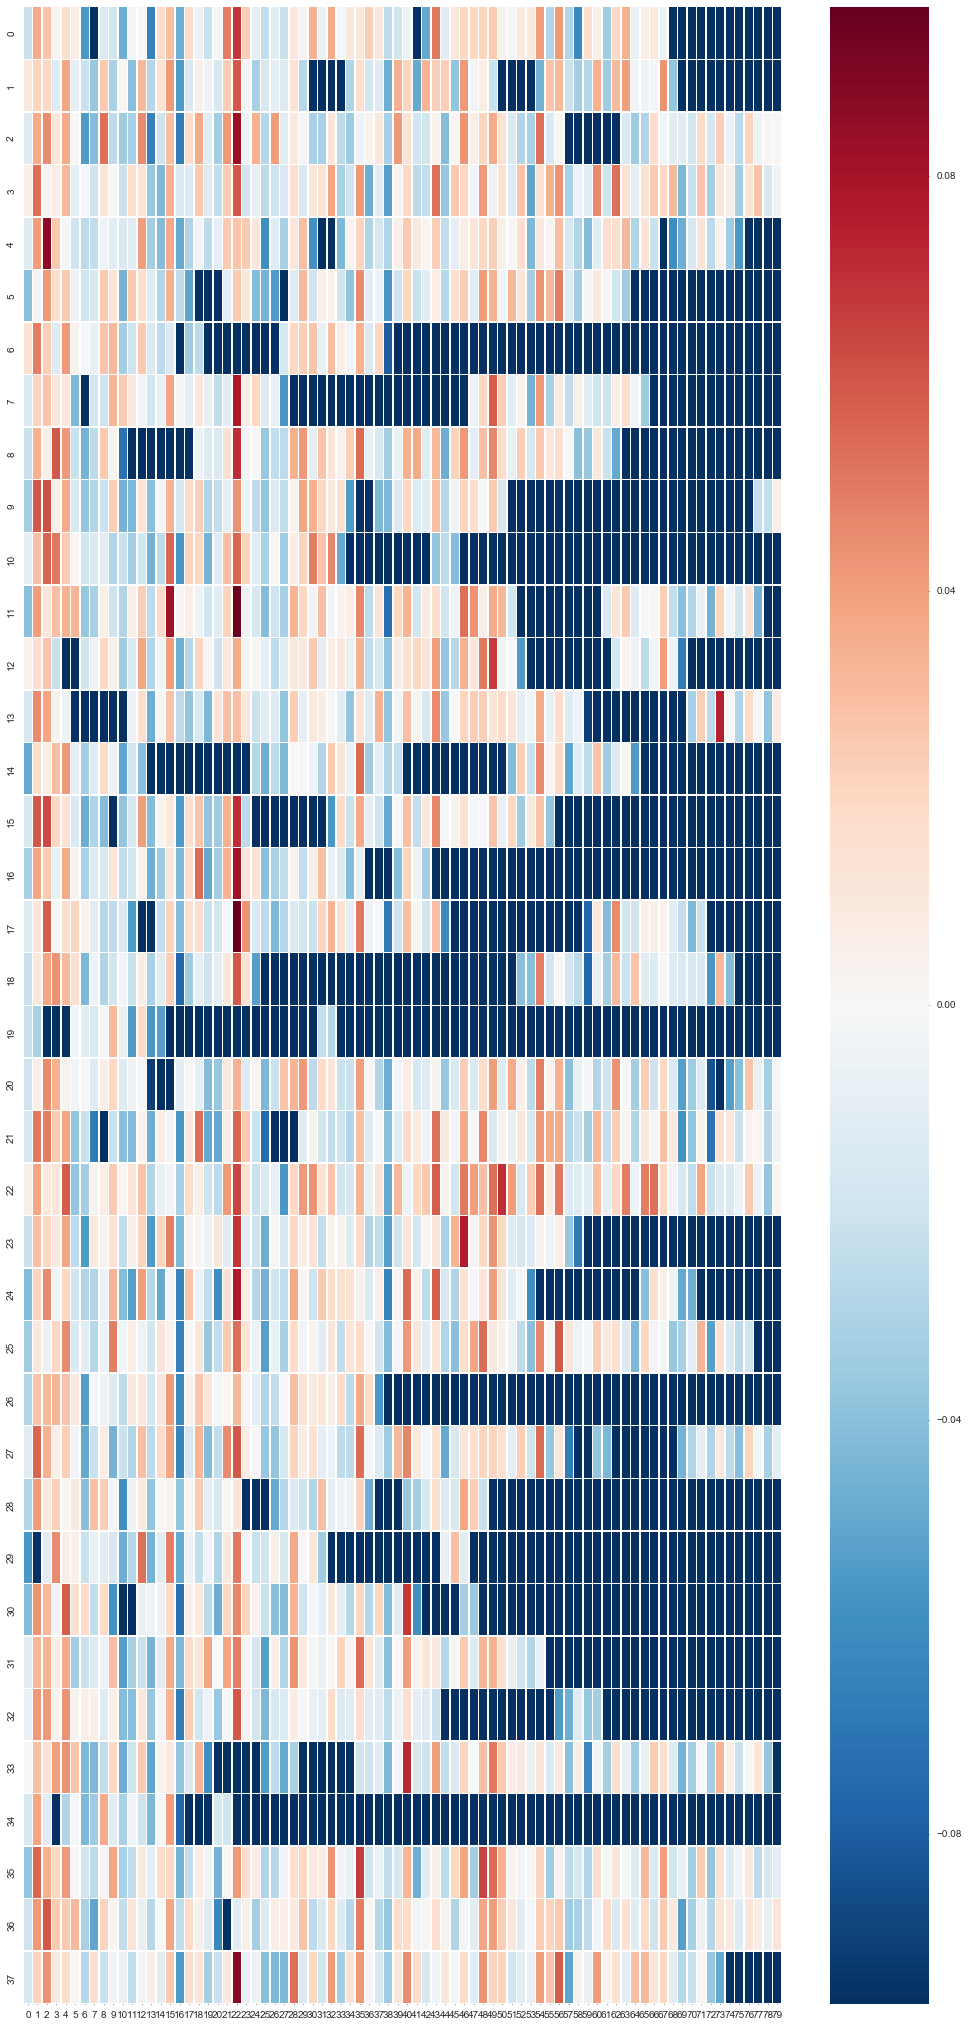

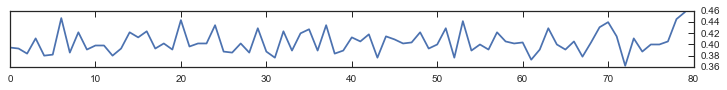

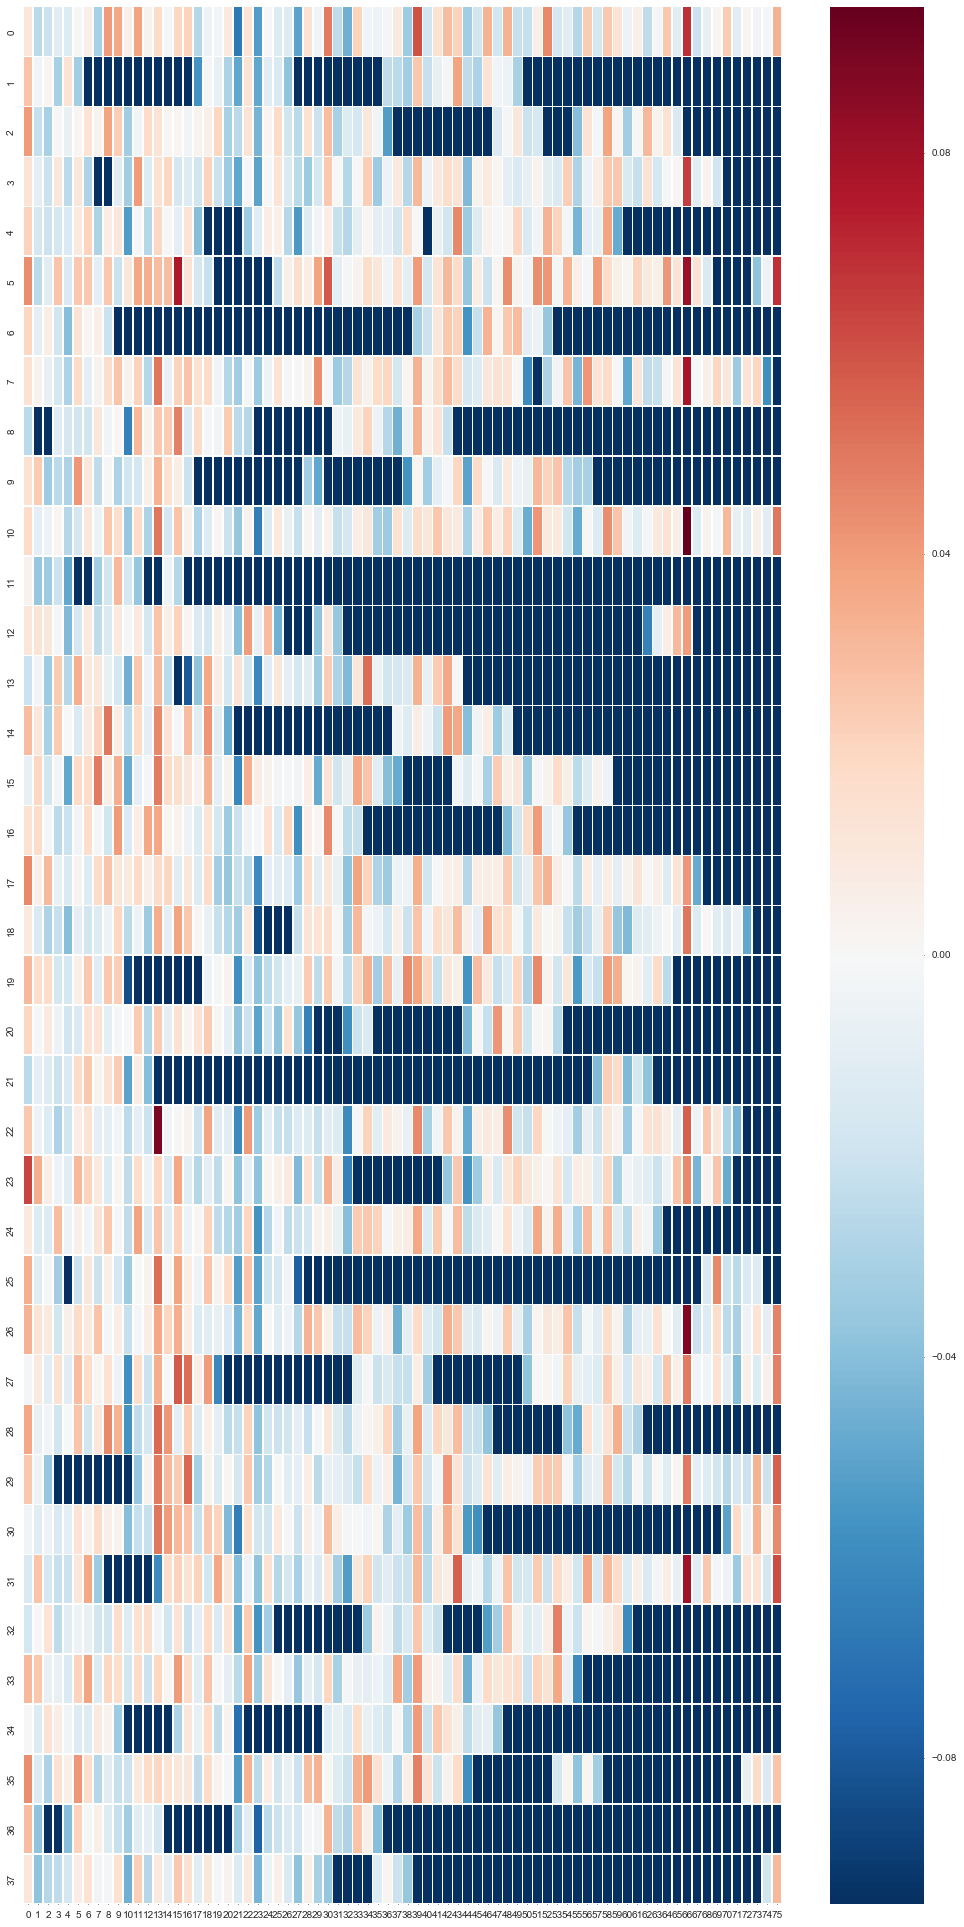

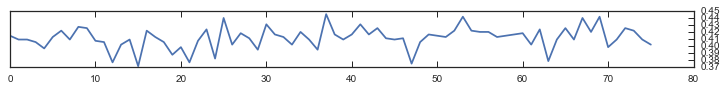

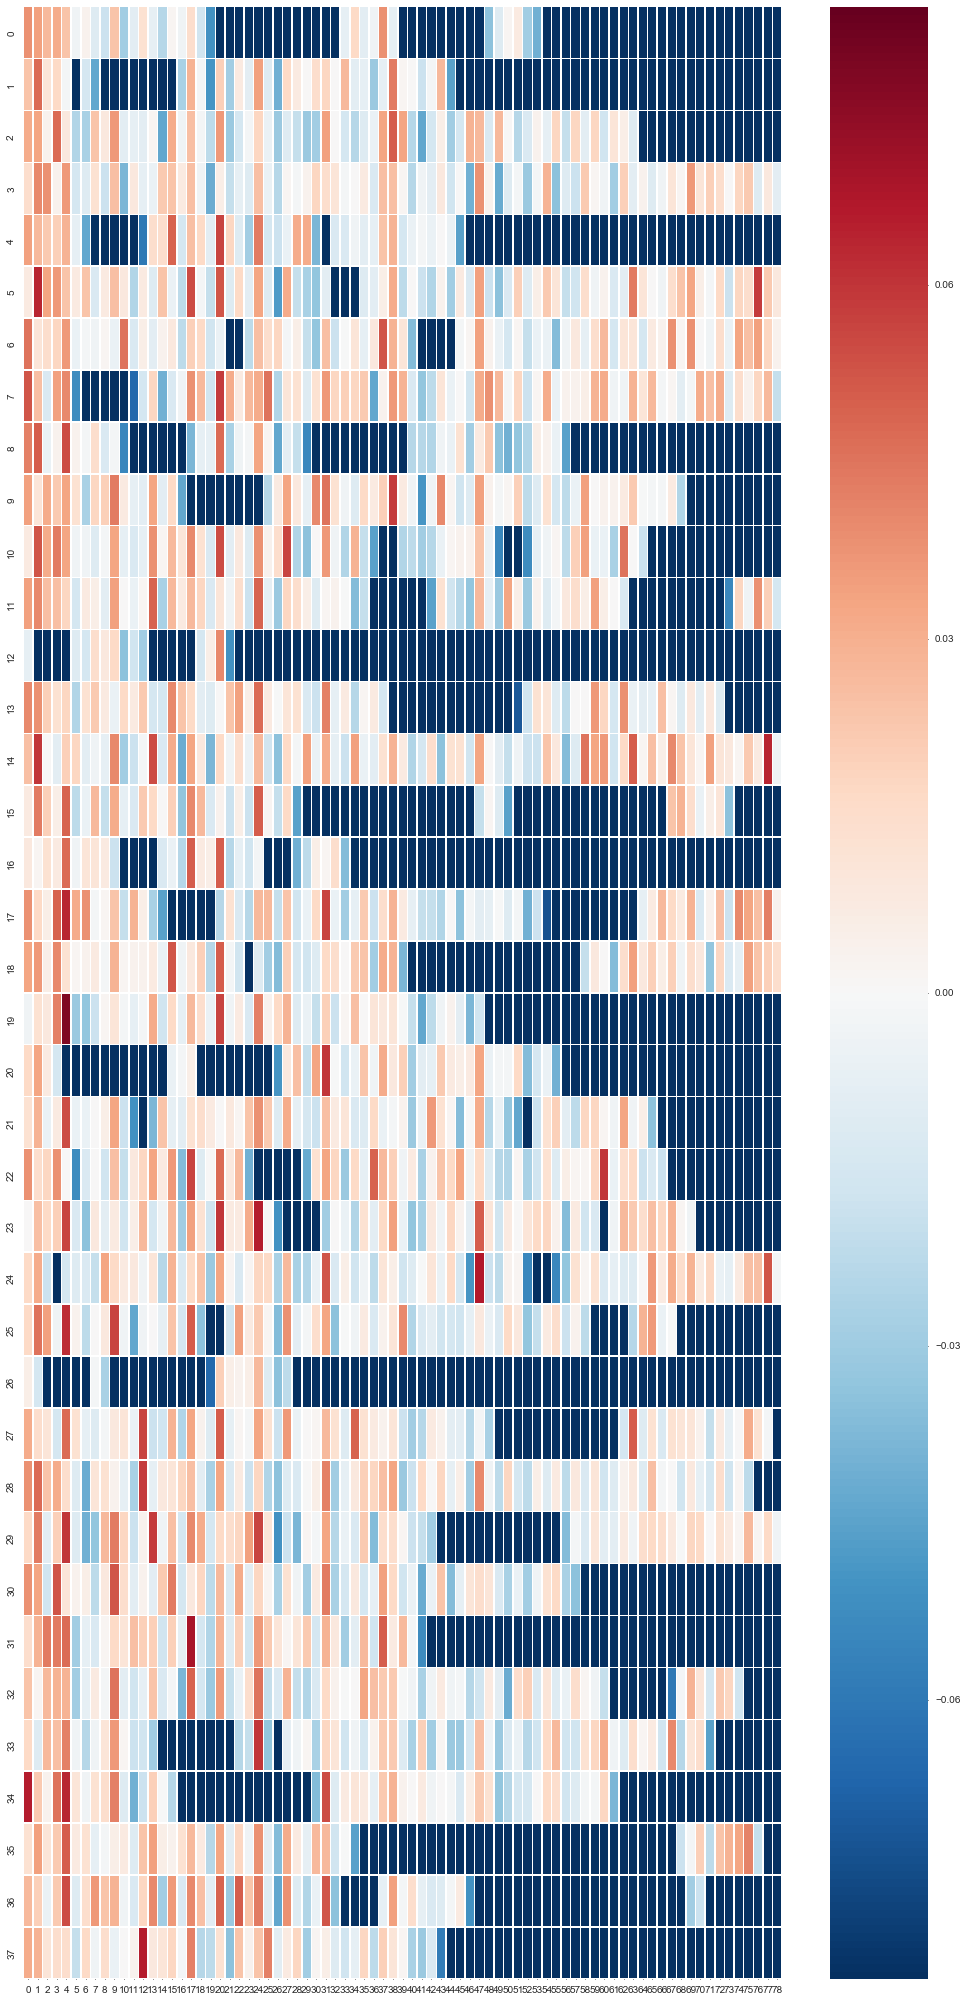

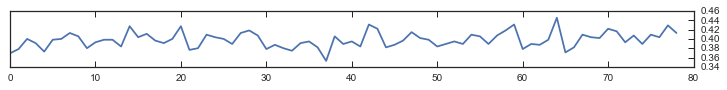

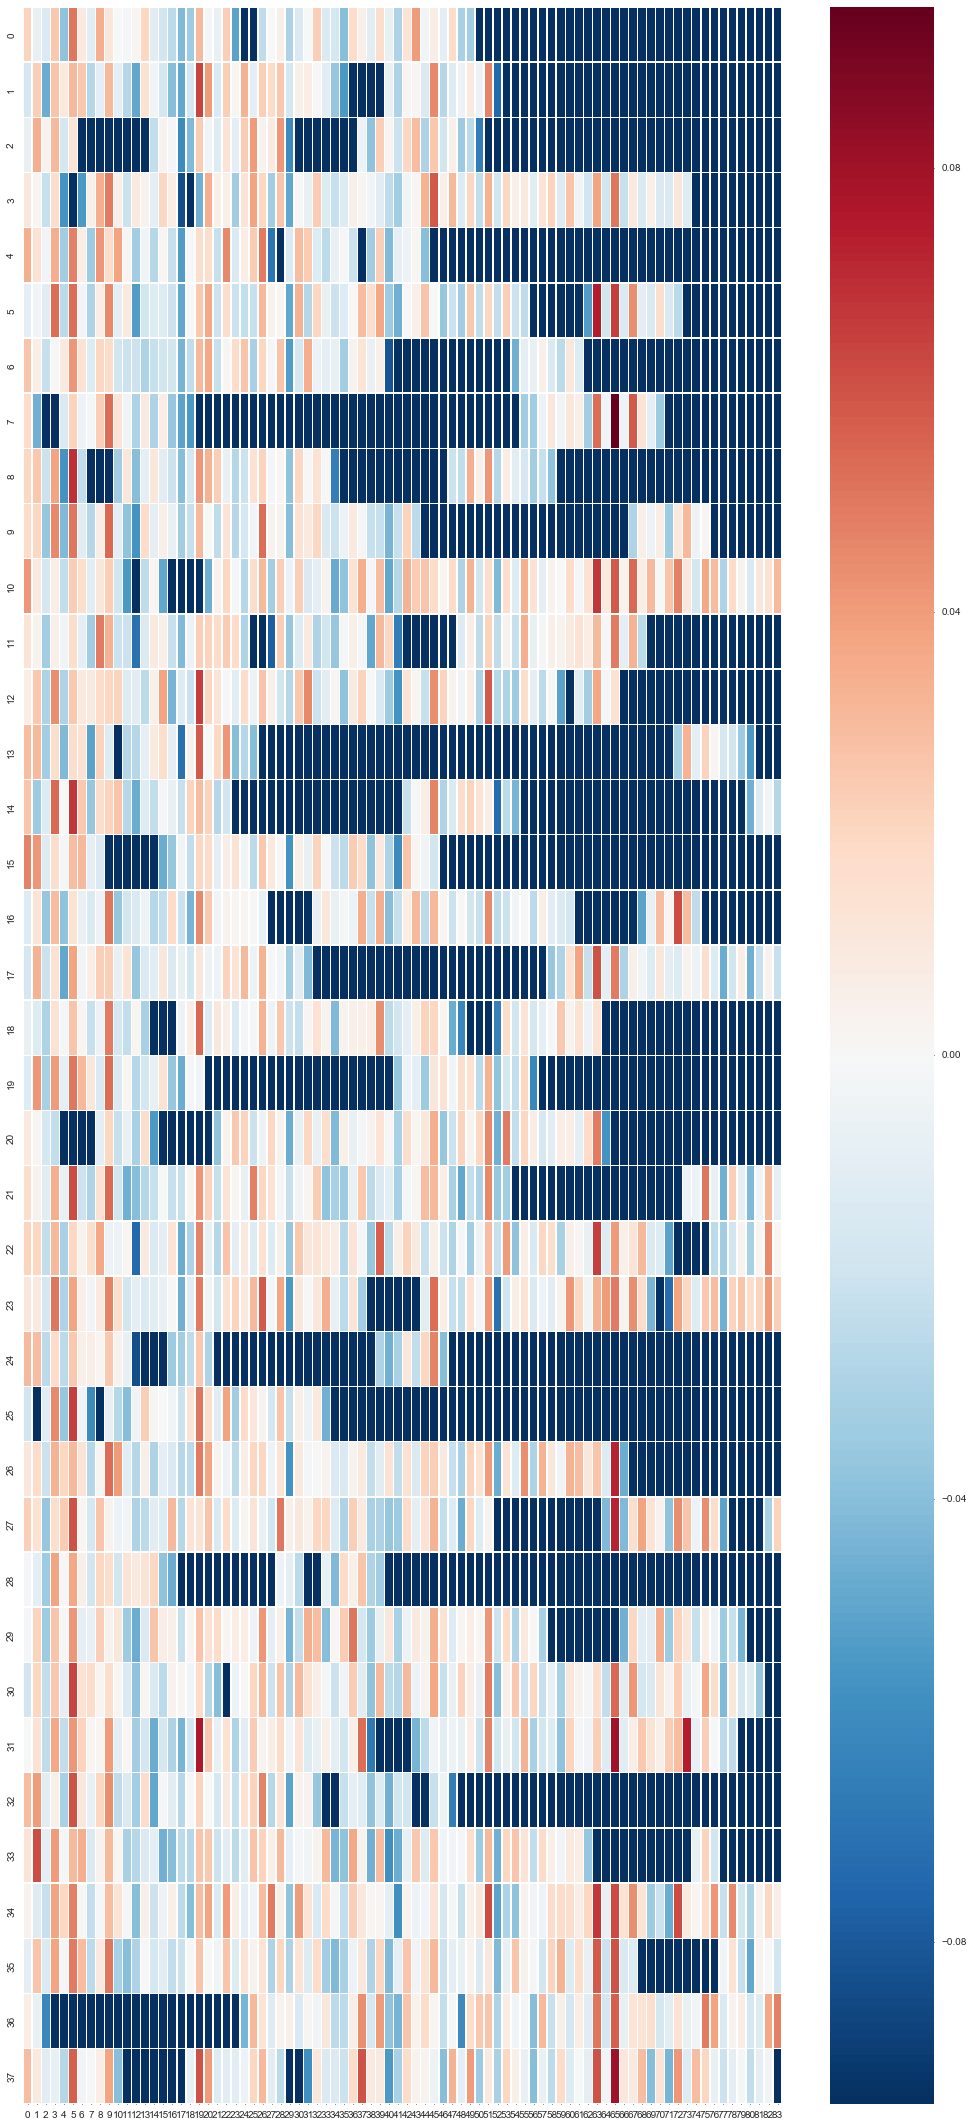

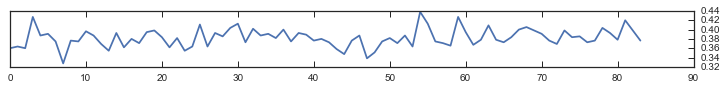

In [20]:
result = {}

for target in range(5):
    result[target] = backwards_forwards_feature_selection(Xtz, Y[:, target], classifier_score)